**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances_chunked as p_d_c
from sklearn.datasets import fetch_openml
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        if self.algorithm == 'kd_tree':
            self.X_train = KDTree(X)
    
    def predict(self, X):
        if self.algorithm == 'brute':
            dist_mtr = list(p_d_c(X, self.X_train))[0]
            arr_cls = self.y_train[np.argpartition(dist_mtr, self.n_neighbors, axis=1)[:,:self.n_neighbors]]
        if self.algorithm == 'kd_tree':
            arr_cls = self.y_train[self.X_train.query(X, k=self.n_neighbors, return_distance=False)]
        return np.asarray([np.unique(i)[np.argmax(np.unique(i, return_counts=True)[1])] for i in arr_cls])
                 
    def predict_proba(self, X):
        n_classes = len(np.unique(self.y_train))
        if self.algorithm == 'brute':
            dist_mtr = list(p_d_c(X, self.X_train))[0]
            arr_cls = self.y_train[np.argpartition(dist_mtr, self.n_neighbors, axis=1)[:,:self.n_neighbors]]
        if self.algorithm == 'kd_tree':
            y_buf = np.asarray(self.y_train, dtype=np.uint32)
            arr_cls = y_buf[self.X_train.query(X, k=self.n_neighbors, return_distance=False)]
        answ = np.apply_along_axis(np.bincount, 1, np.asarray(arr_cls, dtype='int64'), minlength=n_classes)
        return answ / np.sum(answ, axis=1).reshape((answ.shape[0],1))
    
    def score(self, X, y):
        if self.algorithm == 'brute':
            dist_mtr = list(p_d_c(X, self.X_train))[0]
            arr_cls = self.y_train[np.argpartition(dist_mtr, self.n_neighbors, axis=1)[:,:self.n_neighbors]]
        if self.algorithm == 'kd_tree':
            arr_cls = self.y_train[self.X_train.query(X, k=self.n_neighbors, return_distance=False)]
        arr_sc = np.asarray([np.unique(i)[np.argmax(np.unique(i, return_counts=True)[1])] for i in arr_cls])
        return np.count_nonzero(y == arr_sc) / y.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 873 µs, sys: 683 µs, total: 1.56 ms
Wall time: 1.29 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 37 µs, sys: 18 µs, total: 55 µs
Wall time: 46 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 3.76 ms, sys: 1.64 ms, total: 5.4 ms
Wall time: 3.94 ms


array([1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1])

In [9]:
%time my_clf.predict(X_test)


CPU times: user 2.31 ms, sys: 1.82 ms, total: 4.13 ms
Wall time: 2.71 ms


array([1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.59 ms, sys: 1.09 ms, total: 2.68 ms
Wall time: 1.7 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.21 ms, sys: 227 µs, total: 1.44 ms
Wall time: 1.43 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

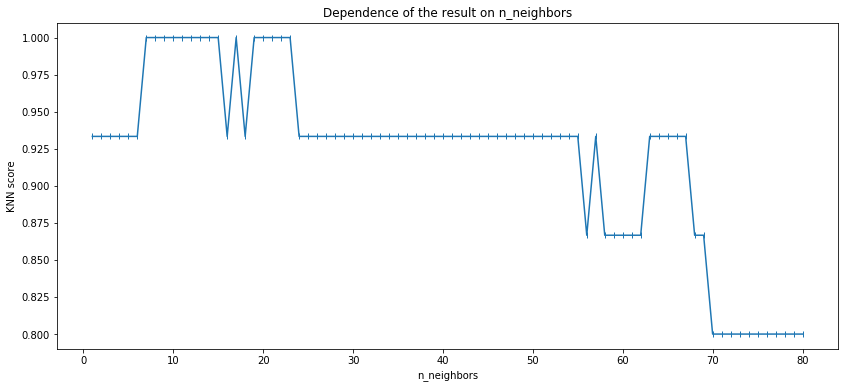

Best n_neighbors for my_clf:
 (array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22]),)


In [14]:
result = np.zeros(80)
n_neighbors = np.arange(1,81)
for i in n_neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    result[i - 1] = my_clf.score(X_test, y_test)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('KNN score')
ax.set_title('Dependence of the result on n_neighbors')
ax.plot(n_neighbors, result, marker="|")
plt.show()
print("Best n_neighbors for my_clf:\n", np.where(result == result.max()))

**MNIST**

In [15]:
#mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 148 ms, sys: 2 ms, total: 150 ms
Wall time: 149 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 185 ms, sys: 161 ms, total: 346 ms
Wall time: 175 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 2.75 s, sys: 260 ms, total: 3.01 s
Wall time: 1.74 s


array(['5', '3', '1', '0', '1', '1', '8', '8', '5', '3', '6', '2', '2',
       '0', '1', '6', '7', '1', '3', '2', '4', '7', '4', '0', '3', '6',
       '9', '8', '4', '4', '2', '0', '5', '3', '1', '8', '4', '3', '6',
       '4', '2', '0', '5', '0', '0', '4', '7', '7', '6', '3', '9', '3',
       '8', '7', '2', '0', '8', '3', '0', '3', '4', '8', '6', '8', '5',
       '9', '9', '3', '3', '7', '7', '8', '7', '8', '8', '7', '0', '5',
       '5', '9', '8', '7', '1', '8', '4', '1', '9', '5', '4', '3', '1',
       '6', '1', '9', '5', '3', '7', '4', '4', '6', '8', '9', '5', '0',
       '3', '7', '1', '1', '0', '0', '0', '4', '7', '0', '1', '1', '6',
       '3', '0', '2', '5', '8', '9', '2', '8', '4', '3', '8', '2', '1',
       '9', '9', '4', '6', '1', '7', '7', '6', '0', '5', '8', '7', '3',
       '5', '0', '6', '1', '0', '8', '0', '8', '0', '9', '1', '3', '0',
       '2', '1', '9', '4', '7', '9', '6', '6', '2', '4', '2', '1', '4',
       '2', '3', '3', '5', '2', '5', '1', '0', '2', '0', '6', '9

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2.9 s, sys: 250 ms, total: 3.15 s
Wall time: 1.84 s


array(['5', '3', '1', '0', '1', '1', '8', '8', '5', '3', '6', '2', '2',
       '0', '1', '6', '7', '1', '3', '2', '4', '7', '4', '0', '3', '6',
       '9', '8', '4', '4', '2', '0', '5', '3', '1', '8', '4', '3', '6',
       '4', '2', '0', '5', '0', '0', '4', '7', '7', '6', '3', '9', '3',
       '8', '7', '2', '0', '8', '3', '0', '3', '4', '8', '6', '8', '5',
       '9', '9', '3', '3', '7', '7', '8', '7', '8', '8', '7', '0', '5',
       '5', '9', '8', '7', '1', '8', '4', '1', '9', '5', '4', '3', '1',
       '6', '1', '9', '5', '3', '7', '4', '4', '6', '8', '9', '5', '0',
       '3', '7', '1', '1', '0', '0', '0', '4', '7', '0', '1', '1', '6',
       '3', '0', '2', '5', '8', '9', '2', '8', '4', '3', '8', '2', '1',
       '9', '9', '4', '6', '1', '7', '7', '6', '0', '5', '8', '7', '3',
       '5', '0', '6', '1', '0', '8', '0', '8', '0', '9', '1', '3', '0',
       '2', '1', '9', '4', '7', '9', '6', '6', '2', '4', '2', '1', '4',
       '2', '3', '3', '5', '2', '5', '1', '0', '2', '0', '6', '9

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 2.57 s, sys: 242 ms, total: 2.81 s
Wall time: 1.72 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.9 s, sys: 251 ms, total: 3.15 s
Wall time: 1.84 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9728571428571429

In [25]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 35.4 s, sys: 137 ms, total: 35.5 s
Wall time: 35.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 35.6 s, sys: 418 ms, total: 36 s
Wall time: 35.4 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 5s, sys: 40.5 ms, total: 1min 5s
Wall time: 1min 5s


array(['7', '9', '7', '9', '7', '8', '3', '2', '6', '9', '0', '6', '3',
       '2', '9', '7', '9', '8', '3', '5', '8', '4', '9', '6', '3', '6',
       '6', '4', '4', '3', '5', '0', '7', '1', '2', '0', '2', '2', '6',
       '3', '9', '2', '4', '1', '7', '9', '9', '1', '1', '3', '1', '2',
       '5', '0', '0', '7', '0', '5', '9', '7', '2', '5', '8', '3', '5',
       '1', '1', '3', '2', '7', '3', '3', '5', '0', '9', '3', '9', '5',
       '3', '1', '5', '3', '2', '8', '5', '4', '8', '1', '1', '1', '3',
       '9', '2', '4', '6', '8', '5', '9', '4', '1', '2', '9', '1', '8',
       '1', '9', '5', '1', '1', '0', '2', '2', '0', '8', '0', '8', '0',
       '3', '0', '7', '5', '9', '7', '0', '2', '2', '1', '5', '4', '3',
       '1', '9', '8', '6', '2', '2', '0', '9', '0', '5', '1', '7', '1',
       '3', '2', '7', '4', '1', '7', '5', '8', '6', '3', '7', '5', '2',
       '9', '9', '4', '7', '3', '7', '6', '0', '8', '2', '3', '5', '5',
       '9', '7', '2', '0', '4', '1', '2', '0', '3', '8', '1', '9

In [31]:
%time my_clf.predict(X_test)

CPU times: user 57.1 s, sys: 28.7 ms, total: 57.2 s
Wall time: 57.2 s


array(['7', '9', '7', '9', '7', '8', '3', '2', '6', '9', '0', '6', '3',
       '2', '9', '7', '9', '8', '3', '5', '8', '4', '9', '6', '3', '6',
       '6', '4', '4', '3', '5', '0', '7', '1', '2', '0', '2', '2', '6',
       '3', '9', '2', '4', '1', '7', '9', '9', '1', '1', '3', '1', '2',
       '5', '0', '0', '7', '0', '5', '9', '7', '2', '5', '8', '3', '5',
       '1', '1', '3', '2', '7', '3', '3', '5', '0', '9', '3', '9', '5',
       '3', '1', '5', '3', '2', '8', '5', '4', '8', '1', '1', '1', '3',
       '9', '2', '4', '6', '8', '5', '9', '4', '1', '2', '9', '1', '8',
       '1', '9', '5', '1', '1', '0', '2', '2', '0', '8', '0', '8', '0',
       '3', '0', '7', '5', '9', '7', '0', '2', '2', '1', '5', '4', '3',
       '1', '9', '8', '6', '2', '2', '0', '9', '0', '5', '1', '7', '1',
       '3', '2', '7', '4', '1', '7', '5', '8', '6', '3', '7', '5', '2',
       '9', '9', '4', '7', '3', '7', '6', '0', '8', '2', '3', '5', '5',
       '9', '7', '2', '0', '4', '1', '2', '0', '3', '8', '1', '9

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 5s, sys: 36.9 ms, total: 1min 5s
Wall time: 1min 5s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 57.2 s, sys: 31.3 ms, total: 57.2 s
Wall time: 57.2 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9657142857142857

In [35]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 5

In [36]:
# seaborn - библиотека, предназначенная для визуализации данных
# matplotlib - библиотека, предназначенная для визуализации данных
# train_test_split - функция, позволяющая разделить датасет на train и test выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - функция, необходимая для совокупности последовательных преобразований
# и для предобработки данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - преобразует данные так, что
# они будут иметь среднее значение равное 0 и стандартное отклонение равное 1
# ClassifierMixin - Mixin-класс для всех классификаторов (в sklearn)
# NeighborsBase - базовый класс для всех KNN алгоритмов (в sklearn)
# KNeighborsMixin - Mixin-класс для реализации разных алгоритмов поиска K ближайших соседей
# SupervisedIntegerMixin - Mixin-класс, предназначенный для замешиваний метода fit (mix in)